<a href="https://colab.research.google.com/github/totinikanungo/Diet-Chart-Recommender-using-ANN/blob/main/Diet_Chart_Recomender_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/my folder new/diest chart dataset.zip"
import zipfile
zip_ref = zipfile.ZipFile(path)
zip_ref.extractall()
zip_ref.close()


In [ ]:
import pandas as pd
df = pd.read_csv("/content/diet_recommendations_dataset.csv")
df.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [ ]:
x= df.iloc[:,1:-1]
x

,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score
0,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1
1,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6
2,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6
3,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4
4,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,Male,72.1,160,28.2,Obesity,Moderate,Active,2639,152.6,166,125.1,Low_Sugar,NaN,Mexican,4.4,55.0,3.6
996,35,Female,104.0,171,35.6,Hypertension,Moderate,Moderate,1661,172.2,126,78.6,Low_Sodium,NaN,Chinese,7.3,88.8,2.9
997,49,Female,56.0,182,16.9,Obesity,Severe,Moderate,3102,228.0,148,70.2,Low_Sugar,NaN,Indian,8.9,68.6,4.8
998,64,Male,66.6,185,19.5,Diabetes,Severe,Active,3235,170.1,177,138.0,Low_Sugar,Gluten,Indian,6.7,52.0,0.1


In [ ]:
x= df.iloc[:,1:-1].values
x

array([[56, 'Male', 58.4, ..., 3.1, 96.6, 3.1],
       [69, 'Male', 101.2, ..., 4.5, 63.2, 0.6],
       [46, 'Female', 63.5, ..., 3.8, 57.5, 4.6],
       ...,
       [49, 'Female', 56.0, ..., 8.9, 68.6, 4.8],
       [64, 'Male', 66.6, ..., 6.7, 52.0, 0.1],
       [66, 'Female', 101.3, ..., 2.0, 68.2, 3.7]], dtype=object)

In [ ]:
y=df.iloc[:,-1].values
y

array(['Balanced', 'Low_Carb', 'Low_Sodium', 'Balanced', 'Low_Carb',
       'Balanced', 'Balanced', 'Low_Carb', 'Balanced', 'Low_Sodium',
       'Low_Sodium', 'Low_Carb', 'Low_Carb', 'Balanced', 'Balanced',
       'Balanced', 'Low_Sodium', 'Low_Carb', 'Balanced', 'Low_Carb',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Low_Carb',
       'Balanced', 'Low_Sodium', 'Balanced', 'Low_Carb', 'Balanced',
       'Balanced', 'Low_Carb', 'Low_Sodium', 'Balanced', 'Low_Sodium',
       'Low_Carb', 'Low_Carb', 'Low_Carb', 'Balanced', 'Low_Sodium',
       'Low_Carb', 'Low_Sodium', 'Low_Sodium', 'Low_Carb', 'Low_Sodium',
       'Low_Sodium', 'Low_Sodium', 'Balanced', 'Low_Carb', 'Balanced',
       'Low_Sodium', 'Low_Sodium', 'Balanced', 'Low_Sodium', 'Balanced',
       'Balanced', 'Low_Sodium', 'Balanced', 'Balanced', 'Low_Carb',
       'Low_Carb', 'Low_Carb', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Low_Sodium', 'Low_Carb', 'Balanced', 'Low_Sodium',
       'Balanced', 'Low_

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Weight_kg,0
Height_cm,0
BMI,0
Disease_Type,204
Severity,0
Physical_Activity_Level,0
Daily_Caloric_Intake,0


In [ ]:
df["Disease_Type"]=df["Disease_Type"].fillna("Disease_Type")
df["Dietary_Restrictions"]=df["Dietary_Restrictions"].fillna("Dietary_Restrictions")
df["Allergies"]=df["Allergies"].fillna("Allergies")
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Weight_kg,0
Height_cm,0
BMI,0
Disease_Type,0
Severity,0
Physical_Activity_Level,0
Daily_Caloric_Intake,0


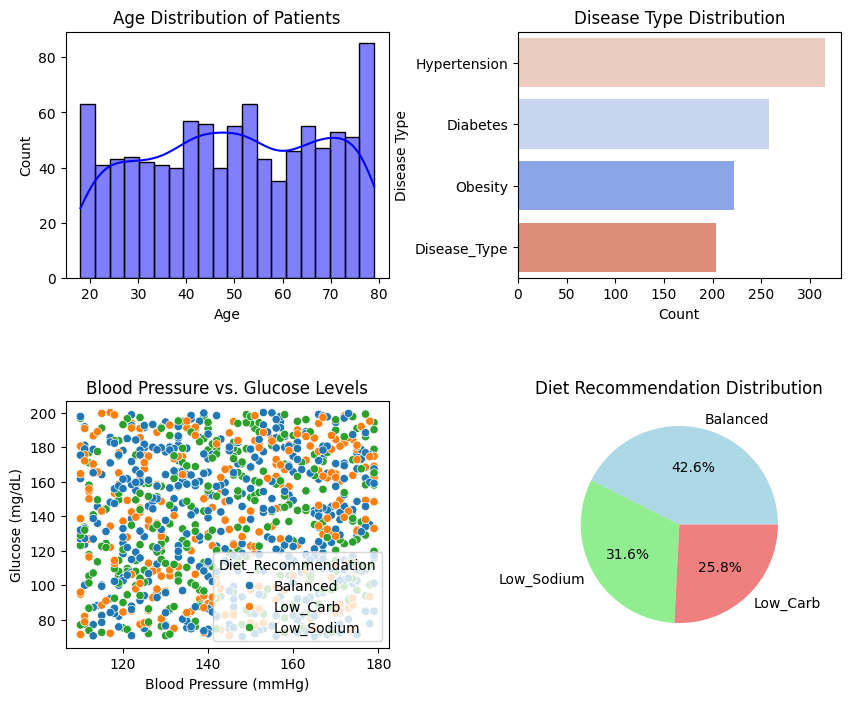

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df['Age'], bins=20, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution of Patients")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

sns.countplot(y=df['Disease_Type'], hue=df['Disease_Type'], order=df['Disease_Type'].value_counts().index, palette="coolwarm", ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Disease Type Distribution")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("Disease Type")

sns.scatterplot(x=df['Blood_Pressure_mmHg'], y=df['Glucose_mg/dL'], hue=df['Diet_Recommendation'], ax=axes[1, 0])
axes[1, 0].set_title("Blood Pressure vs. Glucose Levels")
axes[1, 0].set_xlabel("Blood Pressure (mmHg)")
axes[1, 0].set_ylabel("Glucose (mg/dL)")

df['Diet_Recommendation'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], ax=axes[1, 1])
axes[1, 1].set_title("Diet Recommendation Distribution")
axes[1, 1].set_ylabel("")

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
x[:,1]=en.fit_transform(x[:,1])
en1=LabelEncoder()
x[:,5]=en1.fit_transform(x[:,5])
en2=LabelEncoder()
x[:,6]=en2.fit_transform(x[:,6])
en3=LabelEncoder()
x[:,7]=en3.fit_transform(x[:,7])
en4=LabelEncoder()
x[:,12]=en4.fit_transform(x[:,12])
en5=LabelEncoder()
x[:,13]=en5.fit_transform(x[:,13])
en6=LabelEncoder()
x[:,14]=en6.fit_transform(x[:,14])
x

array([[56, 1, 58.4, ..., 3.1, 96.6, 3.1],
       [69, 1, 101.2, ..., 4.5, 63.2, 0.6],
       [46, 0, 63.5, ..., 3.8, 57.5, 4.6],
       ...,
       [49, 0, 56.0, ..., 8.9, 68.6, 4.8],
       [64, 1, 66.6, ..., 6.7, 52.0, 0.1],
       [66, 0, 101.3, ..., 2.0, 68.2, 3.7]], dtype=object)

In [ ]:
en7=LabelEncoder()
y=en.fit_transform(y.ravel())
y

array([0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2,
       1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.33929464,  0.95501094, -1.30502557, ..., -0.72578563,
         1.46539924,  0.43238034],
       [ 1.05732009,  0.95501094,  0.826653  , ..., -0.23396574,
        -0.78846937, -1.28123864],
       [-0.21303263, -1.04710843, -1.05101715, ..., -0.47987568,
        -1.17311162,  1.46055173],
       ...,
       [-0.04733445, -1.04710843, -1.42455895, ...,  1.31175388,
        -0.42407145,  1.59764125],
       [ 0.78115646,  0.95501094, -0.89661987, ...,  0.53889407,
        -1.54425765, -1.62396244],
       [ 0.89162191, -1.04710843,  0.83163355, ..., -1.11221553,
        -0.45106389,  0.8436489 ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
ann_model= Sequential()
ann_model.add(Dense(units=16,activation='relu',input_dim=18))
#ann_model.add(Dropout(rate=0.1))
ann_model.add(Dense(units=8,activation='relu',input_dim=18))
#ann_model.add(Dropout(rate=0.1))
ann_model.add(Dense(units=3,activation='softmax'))
ann_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467 (1.82 KB)

 Trainable params: 467 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
ann_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ann_model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4054 - loss: 1.1306 - val_accuracy: 0.4200 - val_loss: 1.0688
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4454 - loss: 1.0500 - val_accuracy: 0.4850 - val_loss: 0.9934
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5174 - loss: 0.9670 - val_accuracy: 0.5200 - val_loss: 0.9393
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5215 - loss: 0.9438 - val_accuracy: 0.5450 - val_loss: 0.8908
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5440 - loss: 0.9080 - val_accuracy: 0.5750 - val_loss: 0.8368
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5868 - loss: 0.8466 - val_accuracy: 0.6100 - val_loss: 0.7831
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6042 - loss: 0.7923 - val_accuracy: 0.6450 - val_loss: 0.7264
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6337 - loss: 0.7524 - val_accuracy: 0.6700 - val_loss

In [ ]:
y_pred=ann_model.predict(x_test)
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[9.68302727e-01, 1.88497885e-03, 2.98122372e-02],
       [9.89696205e-01, 1.07253855e-03, 9.23124421e-03],
       [4.05649142e-03, 5.23507655e-01, 4.72435772e-01],
       [8.57273579e-01, 2.30835769e-02, 1.19642824e-01],
       [4.12711129e-02, 5.44465542e-01, 4.14263427e-01],
       [9.10266675e-03, 7.42525816e-01, 2.48371512e-01],
       [9.90338922e-01, 1.49483079e-04, 9.51155555e-03],
       [2.73776621e-01, 3.00276786e-01, 4.25946563e-01],
       [8.04684833e-02, 4.60158199e-01, 4.59373266e-01],
       [1.03519354e-02, 5.54569960e-01, 4.35078055e-01],
       [7.65562594e-01, 2.79198512e-02, 2.06517577e-01],
       [7.39812255e-02, 2.85899758e-01, 6.40119076e-01],
       [9.98147488e-01, 2.26523498e-05, 1.82988204e-03],
       [9.85098258e-02, 3.26801121e-01, 5.74689031e-01],
       [9.96635675e-01, 9.57498560e-05, 3.26858880e-03],
       [6.05105996e-01, 1.04938902e-01, 2.89955229e-01],
       [1.35771954e-03, 6.78532660e-01, 3.20109725e-01],
       [7.01831281e-02, 2.83138

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       2, 0])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred, average='weighted'))
print("Recall =", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score =", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[95  0  0]
 [ 0 44  8]
 [ 4  9 40]]
Accuracy = 0.895
Precision = 0.8924904707451878
Recall = 0.895
F1 Score = 0.8930119375707821
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        95
           1       0.83      0.85      0.84        52
           2       0.83      0.75      0.79        53

    accuracy                           0.90       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.89      0.90      0.89       200



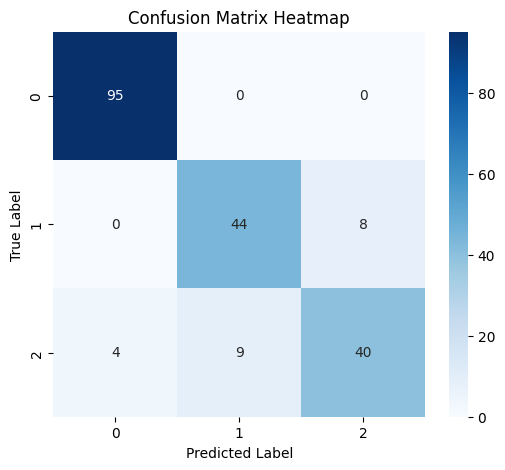

Class 0:
True Positives (TP): 95
False Positives (FP): 4
False Negatives (FN): 0
True Negatives (TN): 101

Class 1:
True Positives (TP): 44
False Positives (FP): 9
False Negatives (FN): 8
True Negatives (TN): 139

Class 2:
True Positives (TP): 40
False Positives (FP): 8
False Negatives (FN): 13
True Negatives (TN): 139



In [ ]:
#confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
# Compute TP, FP, FN, TN for each class
num_classes = cm.shape[0]
for i in range(num_classes):
    TP = cm[i, i]  # Correct predictions for class i
    FP = cm[:, i].sum() - TP  # Wrongly predicted as class i
    FN = cm[i, :].sum() - TP  # Missed class i
    TN = cm.sum() - (TP + FP + FN)  # Everything else

    print(f"Class {i}:")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}\n")

In [ ]:
ann_model.save('/content/drive/MyDrive/my folder new/ann_model.h5')
keras.saving.save_model(ann_model,'/content/drive/MyDrive/my folder new/my_model.keras')